In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
# Read input file and understand the data
# "default" is my dependent variable

In [4]:
gc_df = pd.read_csv("german_credit.csv")  
gc_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [5]:
gc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [6]:
gc_df.shape

(1000, 21)

In [7]:
gc_df['account_check_status'].value_counts()

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

In [8]:
gc_df['credit_history'].value_counts()

existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: credit_history, dtype: int64

In [9]:
gc_df['purpose'].value_counts()

domestic appliances             280
car (new)                       234
radio/television                181
car (used)                      103
business                         97
(vacation - does not exist?)     50
education                        22
repairs                          12
furniture/equipment              12
retraining                        9
Name: purpose, dtype: int64

In [10]:
gc_df['savings'].value_counts()

... < 100 DM                   603
unknown/ no savings account    183
100 <= ... < 500 DM            103
500 <= ... < 1000 DM            63
.. >= 1000 DM                   48
Name: savings, dtype: int64

In [12]:
gc_df['personal_status_sex'].value_counts()

male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: personal_status_sex, dtype: int64

In [11]:
gc_df['present_emp_since'].value_counts()

1 <= ... < 4 years    339
.. >= 7 years         253
4 <= ... < 7 years    174
... < 1 year          172
unemployed             62
Name: present_emp_since, dtype: int64

In [14]:
print(gc_df['other_debtors'].value_counts())
print(gc_df['property'].value_counts())
print(gc_df['other_installment_plans'].value_counts())
print(gc_df['housing'].value_counts())
print(gc_df['job'].value_counts())
print(gc_df['foreign_worker'].value_counts())

none            907
guarantor        52
co-applicant     41
Name: other_debtors, dtype: int64
if not A121/A122 : car or other, not in attribute 6                 332
real estate                                                         282
if not A121 : building society savings agreement/ life insurance    232
unknown / no property                                               154
Name: property, dtype: int64
none      814
bank      139
stores     47
Name: other_installment_plans, dtype: int64
own         713
rent        179
for free    108
Name: housing, dtype: int64
skilled employee / official                                      630
unskilled - resident                                             200
management/ self-employed/ highly qualified employee/ officer    148
unemployed/ unskilled - non-resident                              22
Name: job, dtype: int64
yes    963
no      37
Name: foreign_worker, dtype: int64


In [15]:
gc_df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [16]:
# Print Shape of model data

In [18]:
gc_df.shape

(1000, 21)

In [20]:
gc_df_d=pd.get_dummies(gc_df,drop_first=True)

In [21]:
gc_df_d.shape

(1000, 49)

### Check for highly correlated variables but don't required any treatment for this use case

In [26]:
gc_df2 = gc_df_d.corr().unstack().reset_index()
gc_df2[((gc_df2[0] > 0.5)&(gc_df2[0] < 1)) | (gc_df2[0] < -0.6)]

,level_0,level_1,0
51,duration_in_month,credit_amount,0.624984
99,credit_amount,duration_in_month,0.624984
305,credits_this_bank,credit_history_critical account/ other credits...,0.501364
545,credit_history_critical account/ other credits...,credits_this_bank,0.501364
552,credit_history_critical account/ other credits...,credit_history_existing credits paid back duly...,-0.683617
648,credit_history_existing credits paid back duly...,credit_history_critical account/ other credits...,-0.683617
1751,other_debtors_guarantor,other_debtors_none,-0.731408
1799,other_debtors_none,other_debtors_guarantor,-0.731408
2101,housing_own,housing_rent,-0.735968
2149,housing_rent,housing_own,-0.735968


### Drop the original variables which are converted to dummy

In [29]:
col = pd.DataFrame(gc_df_d.columns)

In [30]:
col

,0
0,default
1,duration_in_month
2,credit_amount
3,installment_as_income_perc
4,present_res_since
5,age
6,credits_this_bank
7,people_under_maintenance
8,account_check_status_< 0 DM
9,account_check_status_>= 200 DM / salary assign...


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [32]:
from sklearn.model_selection import train_test_split


NameError: name 'X' is not defined

In [34]:
y = gc_df_d['default']

In [35]:
X=gc_df_d.iloc[:,1:]

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=99)

In [37]:
X_train.shape

(700, 48)

In [38]:
y_train.shape

(700,)

In [39]:
y_test.head(2)

890    0
983    1
Name: default, dtype: int64

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
RFC = RandomForestClassifier(n_estimators=500,n_jobs=2,criterion="entropy",random_state=9999)

In [42]:
rfcl = RFC.fit(X_train,y_train)

In [43]:
y_predict = rfcl.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       216
           1       0.71      0.30      0.42        84

   micro avg       0.77      0.77      0.77       300
   macro avg       0.75      0.63      0.64       300
weighted avg       0.76      0.77      0.73       300



In [45]:
confusion_matrix(y_test,y_predict)

array([[206,  10],
       [ 59,  25]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_predict)

0.77

### Q6 Show the list of the features importance( 1 Marks)

In [48]:
imp = RFC.feature_importances_

In [49]:
sorted_imp = pd.DataFrame(sorted(zip(imp, list(X_test)), reverse=True))

In [50]:
sorted_imp

,0,1
0,0.115795,credit_amount
1,0.089615,age
2,0.082242,duration_in_month
3,0.051895,account_check_status_no checking account
4,0.041556,installment_as_income_perc
5,0.040471,present_res_since
6,0.030608,account_check_status_< 0 DM
7,0.022304,other_installment_plans_none
8,0.021763,credit_history_critical account/ other credits...
9,0.021608,purpose_car (new)


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [52]:
# Use below values
num_folds = 10
seed = 77

In [53]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
#Validate the Random Forest model build above using k fold

In [54]:
result = cross_val_score(RFC, X_train, y_train, cv=kfold)

In [0]:
#Calculate Mean score

In [55]:
result.mean()

0.7442857142857143

In [0]:
# Calculate score standard deviation using std()

In [56]:
result.std()

0.06774803257931074

# Q8 Print the confusion matrix( 1 Marks)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_test,y_predict)

array([[206,  10],
       [ 59,  25]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       216
           1       0.71      0.30      0.42        84

   micro avg       0.77      0.77      0.77       300
   macro avg       0.75      0.63      0.64       300
weighted avg       0.76      0.77      0.73       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

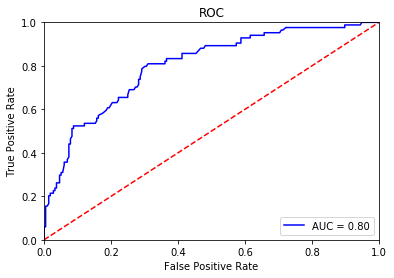

In [62]:
prob = RFC.predict_proba(X_test)
preds = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [63]:
metrics.auc(fpr, tpr)

0.8023589065255732

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [64]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [73]:
rfm=RandomForestClassifier()

In [84]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [85]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  nan
Standard deviation:  nan
